In [ ]:
# Final Analysis
# Review all the figures and tables that you generated in this assignment. 
# Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

#Observation 1
    # Mice treated with Ramicane had the lowest mean and median tumor volume. Contrastingly, mice treated with Ketapril had the lowest mean and median tumor volume.
    
#Observation 2
    # For mouse r944, the tumor volume increased to its maximum size at day 15 with a volume of about 47.5 mm3. After reaching its maximum size, the tumor volume significantly decreased over the next 20+ days.
    # The tumor volume reached its lowest volume at day 35, with a volume of about 40 mm3.
    # It can be inferred that the treatment mouse r944 received, Capomulin was effective at decreaseing the tumor volume over time.
    
#Observation 3
    # There is a strong positive correlation between the weight (g) and the tumor volume (mm3) of mice that were treated by Capomulin. The correlation between these two variables is 0.84.
    # Therfore, it can be inferred that a Capomulin-treated mouse's weight is dependent on its tumor volume (mm3). As a Capoumulin-treated mouse's tumor volu


In [2]:
# Prepare the Data

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. 

#count the number of mice

num_mice = df.nunique()
num_mice['Mouse ID']

249

In [5]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [9]:
#create a new df removing the duplicate mouse id and its data

clean_df = df[df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Display the updated number of unique mice IDs.
num_mice = clean_df.nunique()
num_mice['Mouse ID']

248

In [11]:
#summary statistics

In [12]:
# For the first table, use the `groupby` method to generate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen. 
    # This should result in five unique series objects. 
    # Combine these objects into a single summary statistics DataFrames.

In [13]:
#mean
means = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

#median
medians = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

#variance
variances = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

#standard deviation
std_devs = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']


#SEM
sems = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({'Mean Tumor Volume':means,
                           'Median Tumor Volume':medians,
                           'Tumor Volume Variance':variances,
                           'Tumor Volume Standard Deviation':std_devs,
                           'Tumor Volume SEMs':sems
                          })

#formatting
summary_df["Mean Tumor Volume"] = summary_df["Mean Tumor Volume"].map("{:.3f}".format)
summary_df["Median Tumor Volume"] = summary_df["Median Tumor Volume"].map("{:.3f}".format)
summary_df["Tumor Volume Variance"] = summary_df["Tumor Volume Variance"].map("{:.3f}".format)
summary_df["Tumor Volume Standard Deviation"] = summary_df["Tumor Volume Standard Deviation"].map("{:.3f}".format)
summary_df["Tumor Volume SEMs"] = summary_df["Tumor Volume SEMs"].map("{:.3f}".format)


#print the dataframe
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEMs
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [14]:
# For the second table, use the `agg` method to produce the same summary statistics table by using a single line of code.

summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

#formatting
summary_df = summary_df.applymap('{:.3f}'.format)


#print the dataframe
summary_df

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

In [15]:
# Create Bar Charts and a Pie Charts

In [16]:
#Generate two bar plots. Both plots should be identical and show the total number of timepoints for all mice tested for each drug regimen throughout the course of the study.

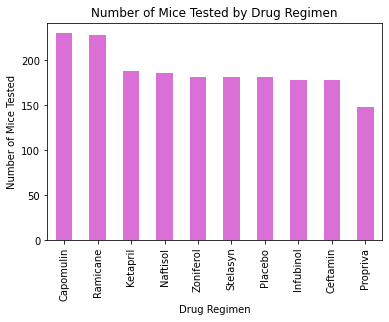

In [27]:
# Create the first bar plot by using Pandas's DataFrame.plot() method.

mice_count = clean_df['Drug Regimen'].value_counts()
ax = mice_count.plot.bar(x='Drug Regimen', y='Number of Mice Tested',title='Number of Mice Tested by Drug Regimen', color='orchid',rot=90)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice Tested")
plt.show()

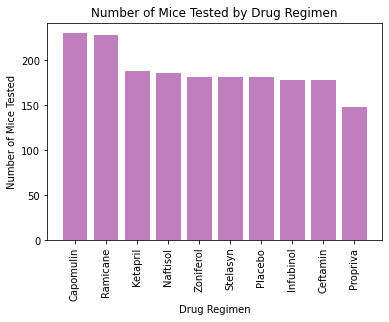

In [36]:
# Create the second bar plot by using Matplotlib's pyplot methods.

mice_count = clean_df['Drug Regimen'].value_counts()
plt.bar(mice_count.index.values,mice_count.values, color='purple', alpha=0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.title('Number of Mice Tested by Drug Regimen')
plt.show()

In [37]:
#Generate two pie plots. Both plots should be identical and show the distribution of female or male mice in the study.

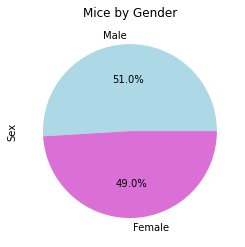

In [49]:
#Create the first pie plot by using both Pandas's DataFrame.plot().

gender_count = clean_df.Sex.value_counts()
gender_count.plot(kind="pie",autopct='%1.1f%%', title='Mice by Gender', colors=['lightblue','orchid'])
plt.show()

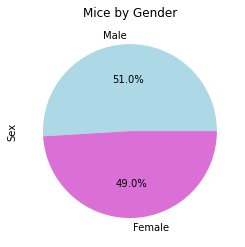

In [50]:
#Create the second pie plot by using Matplotlib's pyplot methods.
gender_count = clean_df.Sex.value_counts()
plt.pie(gender_count.values,labels=gender_count.index.values,autopct='%1.1f%%',colors=['lightblue','orchid'])
plt.ylabel("Sex")
plt.title('Mice by Gender')
plt.show()

In [ ]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
    #Capomulin, Ramicane, Infubinol, and Ceftamin. 
    
#Then, calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment regimens. 
#Follow these substeps:
    # Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.
    # Create a list that holds the treatment names, as well as a second, empty list to hold the tumor volume data.
    # Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
    # Determine outliers by using the upper and lower bounds, and then print the results.

In [52]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 


max_tumor = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this grouped DataFrame with the original cleaned DataFrame.
merge_df = max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [54]:
# Create a list that holds the treatment names, as well as a second, empty list to hold the tumor volume data.

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_df.loc[merge_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    #print the results
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


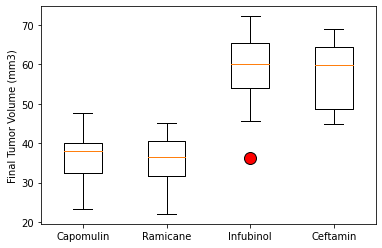

In [88]:
# Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens. Highlight any potential outliers in the plot by changing their color and style.

outlier = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [ ]:
# Create a Line Plot and a Scatter Plot

In [59]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

#create a dataframe with only the capomulin treated mice and select one of the mice

capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_mice['Mouse ID'].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

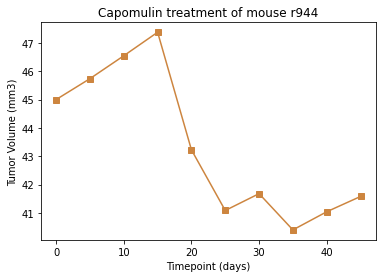

In [66]:
mouse_r944 = capomulin_mice.loc[capomulin_table['Mouse ID']== 'r944']
plt.plot(mouse_r944['Timepoint'],mouse_r944['Tumor Volume (mm3)'],color='peru',marker='s')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse r944')
plt.show()

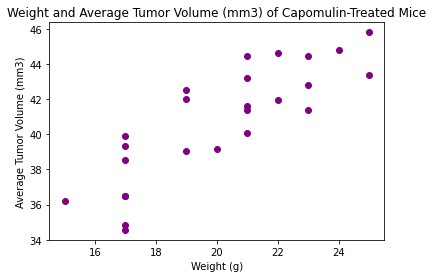

In [74]:
#Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_avg = capomulin_mice.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'],color='purple')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight and Average Tumor Volume (mm3) of Capomulin-Treated Mice')
plt.show()

In [ ]:
#Calculate Correlation and Regression

In [78]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.

corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

The correlation between mouse weight and the average tumor volume is 0.84


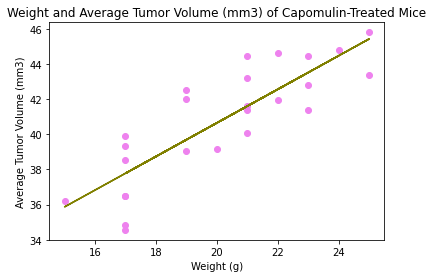

In [87]:
#Plot the linear regression model on top of the previous scatter plot.

y_values = capomulin_avg['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'],color='violet')
plt.plot(capomulin_avg['Weight (g)'],y_values,color="olive")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight and Average Tumor Volume (mm3) of Capomulin-Treated Mice')
plt.show()

In [ ]:
#